# Feature Selection

### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

###  Function to get the DataFrame for a specific driver and path order

In [31]:
def driver_dataframe(df, path_order, driver):
    """
    Extracts and processes the DataFrame for a specific driver and path order.
    
    Parameters:
    df (DataFrame): The original DataFrame.
    path_order (int): The path order identifier.
    driver (str): The driver class identifier.
    
    Returns:
    DataFrame: Processed DataFrame for the specified driver and path order.
    """
    driver_df = df[df['PathOrder'] == path_order]
    driver_df = driver_df[driver_df['Class'] == driver]
    driver_df = driver_df.sort_values(by='Time(s)')
    driver_df.drop(columns=['Class', 'PathOrder'], inplace=True)
    driver_df = driver_df.groupby('Time(s)').mean()
    return driver_df

### Collect all drivers into a dataframe

In [32]:
def prepare_dataset(df, drop_columns, random_seed=123):
    """
    Prepares the dataset by dropping specified columns, processing each driver's data,
    and calculating rolling statistics for each feature.
    
    Parameters:
    df (DataFrame): The original DataFrame.
    drop_columns (list): List of columns to drop from the DataFrame.
    random_seed (int): The seed for the random number generator (default is 123).
    
    Returns:
    DataFrame: Processed DataFrame with rolling statistics and necessary columns.
    """
    # Set the random seed for reproducibility
    np.random.seed(random_seed)

    # Drop unimportant columns and create a copy of the DataFrame
    df_copy = df.drop(columns=drop_columns, inplace=False)

    # List to hold individual DataFrames for each driver and path
    df_list = []

    # Nested loops to process each path and driver
    for path in df_copy['PathOrder'].unique():
        for driver in df_copy['Class'].unique():
            # Process the DataFrame for the specific driver and path
            driver_df = driver_dataframe(df_copy, path, driver)
            driver_df['PathOrder'] = path  # Add PathOrder column
            driver_df['Class'] = driver    # Add Class column

            # Append the processed DataFrame to the list
            df_list.append(driver_df)

    # Concatenate all individual DataFrames into a single DataFrame
    all_drivers = pd.concat(df_list, ignore_index=True)
    
    return all_drivers

### unuseful columns

In [33]:
drop_columns = ['Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Wheel_velocity_front_right-hand',
                'Wheel_velocity_front_left-hand', 'Absolute_throttle_position', 'Flywheel_torque',
               'Flywheel_torque_(after_torque_interventions)', 'Torque_converter_turbine_speed_-_Unfiltered',
               'Filtered_Accelerator_Pedal_value', 'Inhibition_of_engine_fuel_cut_off', 'Fuel_Pressure', 
                'Torque_scaling_factor(standardization)', 'Standard_Torque_Ratio', 'Requested_spark_retard_angle_from_TCU',
                'Target_engine_speed_used_in_lock-up_module', 'Glow_plug_control_request']

### loading dataset

In [34]:
data = pd.read_csv("../data/raw/Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv")

In [35]:
# preprocess the all drivers to concatinate in all drivers
preprocessed_data = prepare_dataset(data, drop_columns)

In [36]:
preprocessed_data

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,PathOrder,Class
0,595.2,0.0,7.55,0.0,55.0,129.0,0.0,-0.4,974.0,12.90,12.70,-6.35,62.5,870.0,10.35,44.30,2.00,63.65,508.0,0.0,0.0,554.90,0.0,59.5,1.0,0.0,0.0,0.0,-4.25,1.0,166.80,0.0,-8.1,224.0,-0.90,1,A
1,537.6,0.0,6.60,0.0,39.0,129.0,0.0,-0.4,1161.5,6.05,11.70,-3.95,62.5,880.0,6.05,29.05,2.00,65.45,508.0,0.0,0.0,1113.75,0.0,59.5,1.0,0.0,0.0,0.0,-3.95,1.0,165.50,0.0,-4.2,0.0,-1.05,1,A
2,326.4,0.0,5.90,0.0,33.5,129.0,0.0,-0.4,1098.0,6.05,11.30,4.10,62.5,880.0,6.05,24.15,2.00,64.45,508.0,0.0,0.0,1088.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.85,0.0,-0.2,0.0,-1.00,1,A
3,268.8,0.0,5.65,0.0,32.0,129.0,0.0,-0.4,995.0,6.65,10.90,6.35,62.5,880.0,6.65,22.75,2.15,62.90,508.0,0.0,0.0,980.00,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-1.00,1,A
4,275.2,0.0,6.15,0.0,34.5,129.0,0.0,-0.8,947.0,8.00,13.45,6.20,62.5,880.0,8.00,24.50,2.15,62.10,508.0,0.0,1.0,917.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-0.95,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46331,358.4,0.0,7.10,0.0,59.0,2.0,0.0,6.3,679.0,21.10,14.50,-4.90,85.0,670.0,21.10,47.80,2.00,56.60,508.0,0.0,1.0,0.00,1.0,84.0,1.0,0.0,5.0,0.0,0.00,2.0,51.90,0.0,-0.1,0.0,10.60,2,E
46332,358.4,0.0,7.10,-0.8,58.0,2.0,0.0,6.3,678.0,21.10,14.80,-3.00,85.0,670.0,21.10,45.90,2.00,56.60,508.0,0.0,1.0,0.00,0.0,84.0,1.0,0.0,14.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.70,2,E
46333,332.8,0.0,6.60,-1.6,56.0,2.0,0.0,6.3,674.0,19.10,14.50,-5.30,85.0,670.0,19.10,44.70,2.00,56.60,508.0,0.0,1.0,299.80,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.80,2,E
46334,307.2,0.0,6.10,-2.3,51.0,2.0,0.0,7.0,673.0,17.60,15.20,-2.60,86.0,670.0,17.60,39.60,2.00,56.60,508.0,0.0,1.0,651.00,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,54.90,0.0,-0.1,0.0,10.60,2,E


### Splitting featrues and target

In [37]:
X = preprocessed_data.drop(columns=['Class'])
y = preprocessed_data[['Class']]

###  Classifier Model

In [38]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

### Feature Importane

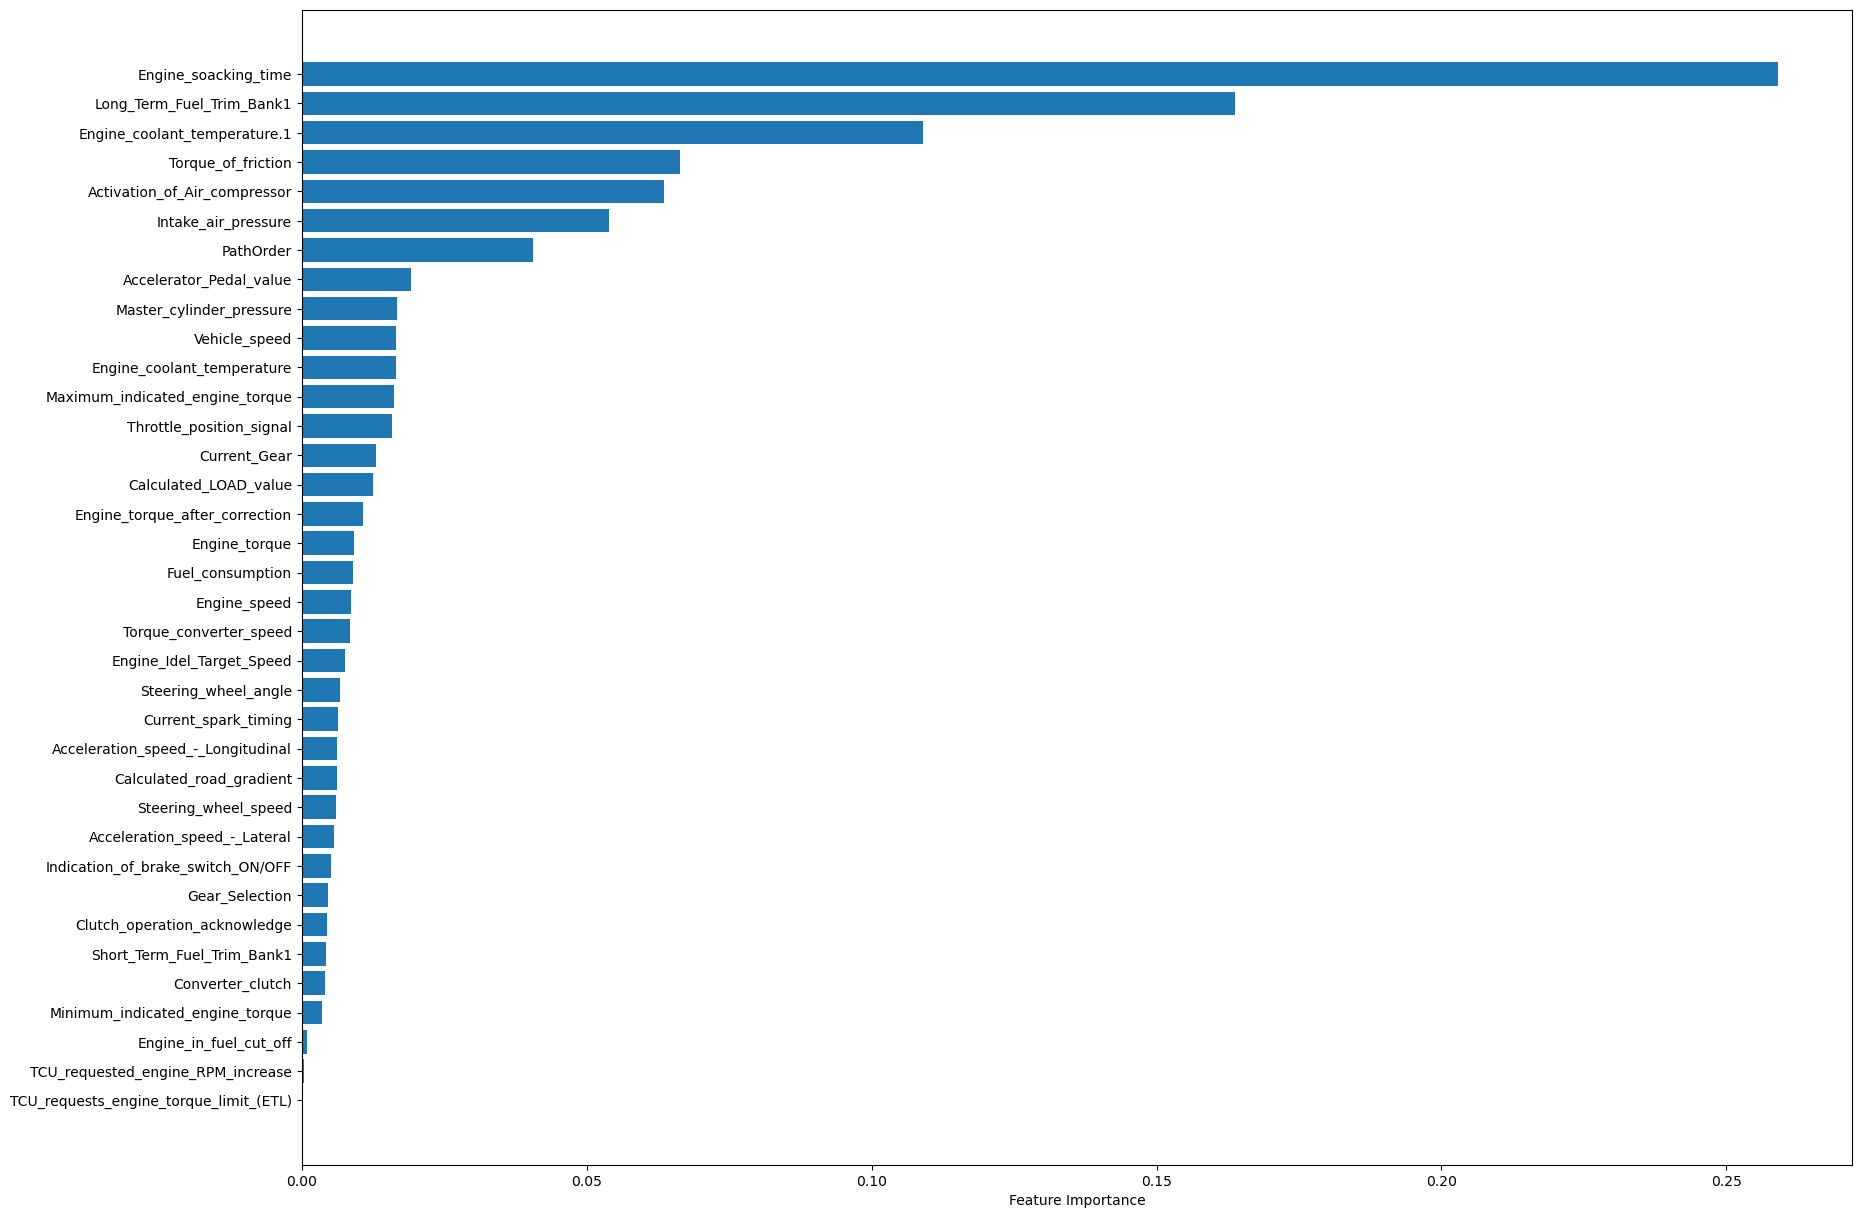

In [39]:
plt.figure(figsize=(20,15))
sort = clf.feature_importances_.argsort()
plt.barh(X.columns[sort], clf.feature_importances_[sort])
plt.xlabel("Feature Importance");

In [40]:
# cumulative_gain for features
cumulative_gain = np.cumsum(clf.feature_importances_[sort][::-1])

# Create a DataFrame with feature names, importances, and cumulative gain
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[sort][::-1],
    'Importance': clf.feature_importances_[sort][::-1],
    'Cumulative Gain': cumulative_gain
})

In [41]:
feature_importance_df

,Feature,Importance,Cumulative Gain
0,Engine_soacking_time,0.259067,0.259067
1,Long_Term_Fuel_Trim_Bank1,0.163701,0.422768
2,Engine_coolant_temperature.1,0.108982,0.531750
3,Torque_of_friction,0.066410,0.598160
4,Activation_of_Air_compressor,0.063517,0.661677
5,Intake_air_pressure,0.053844,0.715521
6,PathOrder,0.040570,0.756091
7,Accelerator_Pedal_value,0.019095,0.775185
8,Master_cylinder_pressure,0.016657,0.791843
9,Vehicle_speed,0.016581,0.808424


In [42]:
selected_features = feature_importance_df[feature_importance_df['Cumulative Gain'] <= 0.91]['Feature']

In [43]:
selected_features

0                Engine_soacking_time
1           Long_Term_Fuel_Trim_Bank1
2        Engine_coolant_temperature.1
3                  Torque_of_friction
4        Activation_of_Air_compressor
5                 Intake_air_pressure
6                           PathOrder
7             Accelerator_Pedal_value
8            Master_cylinder_pressure
9                       Vehicle_speed
10         Engine_coolant_temperature
11    Maximum_indicated_engine_torque
12           Throttle_position_signal
13                       Current_Gear
14              Calculated_LOAD_value
15     Engine_torque_after_correction
16                      Engine_torque
Name: Feature, dtype: object

In [44]:
selected_features = list(selected_features)
selected_features.extend(['Class','Time(s)'])

In [45]:
selected_features

['Engine_soacking_time',
 'Long_Term_Fuel_Trim_Bank1',
 'Engine_coolant_temperature.1',
 'Torque_of_friction',
 'Activation_of_Air_compressor',
 'Intake_air_pressure',
 'PathOrder',
 'Accelerator_Pedal_value',
 'Master_cylinder_pressure',
 'Vehicle_speed',
 'Engine_coolant_temperature',
 'Maximum_indicated_engine_torque',
 'Throttle_position_signal',
 'Current_Gear',
 'Calculated_LOAD_value',
 'Engine_torque_after_correction',
 'Engine_torque',
 'Class',
 'Time(s)']